In [265]:

#Function definition 
def dydx(x, y):
	return ((x - y)/2)

# Finds value of y for a given x using step size h
# and initial value y0 at x0.
def rungeKutta(x0, y0, x, h):
	# Count number of iterations using step size or
	# step height h
	n = (int)((x - x0)/h) 
	# Iterate for number of iterations
	y = y0
	for i in range(1, n + 1):
		"Apply Runge Kutta Formulas to find next value of y"
		k1 = h * dydx(x0, y)
		k2 = h * dydx(x0 + 0.5 * h, y + 0.5 * k1)
		k3 = h * dydx(x0 + 0.5 * h, y + 0.5 * k2)
		k4 = h * dydx(x0 + h, y + k3)

		# Update next value of y
		y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4)

		# Update next value of x
		x0 = x0 + h
	return y

# Driver method
x0 = 0
y = 1
x = 2
h = 0.2
print ('The value of y at x is:', rungeKutta(x0, y, x, h))

# This code is contributed by Prateek Bhindwar


The value of y at x is: 1.1036393232374955


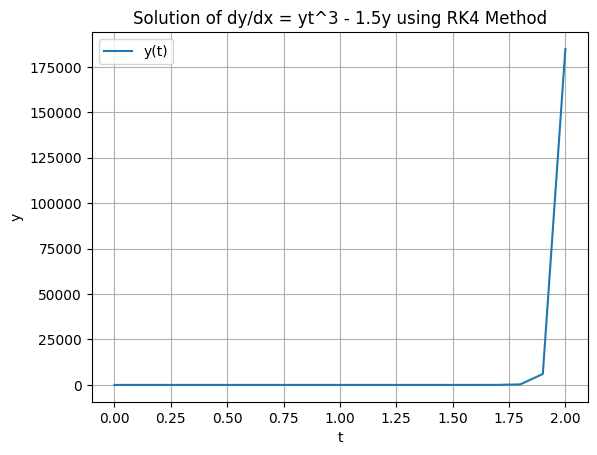

In [266]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    """
    Defines the system of differential equations.
    Args:
        t: Independent variable.
        y: Dependent variables, a list or array.
    Returns:
        List or array of the derivatives of y with respect to t.
    """
    dydt = y[0] * t**3 - 1.5 * y[0]  # Equation given: dy/dx = yt^3 - 1.5y
    return [dydt]

def rk4_step(t, y, h):
    """
    Performs one step of the fourth-order Runge-Kutta method.
    Args:
        t: Current value of the independent variable.
        y: Current values of the dependent variables.
        h: Step size.
    Returns:
        New values of the dependent variables after one RK4 step.
    """
    h = 0.5
    k1 = h * np.array(f(t, y))
    k2 = h * np.array(f(t + 0.5 * h, y + 0.5 * k1 * h ))
    k3 = h * np.array(f(t + 0.5 * h, [y + 0.5 * k2 for i in range(len(y))]))
    k4 = h * np.array(f(t + h, [y[i] + k3[i] for i in range(len(y))]))
    return [y[i] + (k1[i] + 2*k2[i] + 2*k3[i] + k4[i])/6 for i in range(len(y))]

def rk4_solver(t0, y0, t_end, h):
    """
    Solves the differential equation using the fourth-order Runge-Kutta method.
    Args:
        t0: Initial value of the independent variable.
        y0: Initial values of the dependent variables.
        t_end: End value of the independent variable.
        h: Step size.
    Returns:
        Arrays of the independent variable and dependent variables over the specified range.
    """
    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros((len(t_values), len(y0)))
    y_values[0] = y0

    for i in range(len(t_values) - 1):
        y_values[i + 1] = rk4_step(t_values[i], y_values[i], h)

    return t_values, y_values

if __name__ == "__main__":
    t0 = 0.0  # Initial value of independent variable
    y0 = [1.0]  # Initial value of dependent variable
    t_end = 2.0  # End value of independent variable
    h = 0.1  # Step size

    t_values, y_values = rk4_solver(t0, y0, t_end, h)

    plt.plot(t_values, y_values[:, 0], label='y(t)')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Solution of dy/dx = yt^3 - 1.5y using RK4 Method')
    plt.legend()
    plt.grid(True)
    plt.show()


In [267]:
def f(t, y):
  return y * t**3 - 1.5 * y


t0 = 0
y0 = 1
h = 0.5
t = [t0, t0 + h, t0 + 2 * h, t0 + 3 * h, t0 + 4 * h]
y = [y0]

for i in range(4):
  k1 = h * f(t[i], y[i])
  k2 = h * f(t[i] + h / 2, y[i] + k1 / 2)
  k3 = h * f(t[i] + h / 2, y[i] + k2 / 2)
  k4 = h * f(t[i] + h, y[i] + k3)

  y.append(y[i] + (k1 + 2 * k2 + 2 * k3 + k4) / 6)

  print(f"Iteration {i+1}: t = {t[i]}, y = {y[i]}")

print(f"Iteration {i+2}: t = {t[-1]}, y = {y[-1]}")


Iteration 1: t = 0, y = 1
Iteration 2: t = 0.5, y = 0.4810959895451864
Iteration 3: t = 1.0, y = 0.2869322543704177
Iteration 4: t = 1.5, y = 0.37375219279896077
Iteration 5: t = 2.0, y = 2.5130724732170266
